## Dataset initialization

In [1]:
import pandas as pd

#import data sets in protein data
df0=pd.read_csv('KIRC_RPPA.data',sep='\t').set_index('sample').T
df1=pd.read_csv('KIRP_RPPA.data',sep='\t').set_index('sample').T
df2=pd.read_csv('KICH_RPPA.data',sep='\t').set_index('sample').T


In [2]:
df0.shape, df1.shape, df2.shape

((478, 274), (216, 225), (63, 220))

## Preprocessing

### 1. Data Integration

In [3]:
df=pd.concat([df0, df1, df2])

In [4]:
df.shape

(757, 279)

### 2. Data Cleaning

In [5]:
# number of duplicates
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

sample
14-3-3_beta-R-V         0
14-3-3_epsilon-M-C      0
14-3-3_zeta-R-V         0
4E-BP1-R-V              0
4E-BP1_pS65-R-V         0
                     ... 
Bak-R-E               549
C-Raf_pS338-R-E       549
Chk2_pT68-R-E         549
Caspase-3-R-E         549
Caspase-9-R-E         549
Length: 279, dtype: int64

In [7]:
# Count the null values containing features
n=(df.isnull().sum()>0).sum()
n

104

In [8]:
# Check the null values
df.isnull().sum().sort_values(ascending = False).head(n)

sample
C-Raf_pS338-R-V    662
C-Raf_pS338-R-E    549
Bak-R-E            549
Caspase-9-R-E      549
Chk2_pT68-R-E      549
                  ... 
Bap1-c-4-M-V       240
Bak-R-C            208
Chk2_pT68-R-C      208
Caspase-3-R-C      208
BRCA2-R-C           24
Length: 104, dtype: int64

In [9]:
# drop the null values
df=df.dropna(axis=1)

In [10]:
df.shape

(757, 175)

In [11]:
print('Count of zeros')
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if(count>0):
        print('\t', column_name, ' : ', count)

Count of zeros
	 14-3-3_beta-R-V  :  1
	 14-3-3_epsilon-M-C  :  1
	 4E-BP1_pS65-R-V  :  1
	 4E-BP1_pT37_T46-R-V  :  1
	 A-Raf_pS299-R-C  :  1
	 ACVRL1-R-C  :  2
	 Akt-R-V  :  2
	 Akt_pS473-R-V  :  1
	 Akt_pT308-R-V  :  2
	 AMPK_alpha-R-C  :  1
	 c-Kit-R-V  :  1
	 CD20-R-C  :  1
	 CD49b-M-V  :  1
	 CDK1-R-V  :  1
	 eIF4G-R-C  :  1
	 ER-alpha-R-V  :  1
	 ERK2-R-E  :  1
	 ETS-1-R-V  :  1
	 FOXO3a-R-C  :  1
	 FOXO3a_pS318_S321-R-C  :  1
	 GATA3-M-V  :  2
	 HER2_pY1248-R-C  :  1
	 HER3-R-V  :  1
	 Heregulin-R-V  :  1
	 MEK1_pS217_S221-R-V  :  2
	 Mre11-R-C  :  1
	 MSH2-M-V  :  1
	 N-Ras-M-V  :  1
	 NDRG1_pT346-R-V  :  1
	 Notch1-R-V  :  1
	 p27-R-V  :  1
	 p27_pT157-R-C  :  1
	 p90RSK_pT359_S363-R-C  :  1
	 PAI-1-M-E  :  1
	 PDK1-R-V  :  1
	 PEA15-R-V  :  1
	 PI3K-p85-R-V  :  1
	 PKC-delta_pS664-R-V  :  1
	 PKC-pan_BetaII_pS660-R-V  :  1
	 PR-R-V  :  1
	 Rab25-R-V  :  1
	 Raptor-R-V  :  1
	 Rictor_pT1135-R-V  :  2
	 SETD2-R-E  :  1
	 SF2-M-V  :  1
	 Smad4-M-V  :  1
	 Snail-M-E  :  1
	 Src-M

### 3. Feature Selection - Pearson correlation coefficient

In [12]:
#  use Pearson correlation coefficient to find the best features
cor = df.corr(method='pearson')
cor

sample,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,A-Raf_pS299-R-C,ACC_pS79-R-V,ACVRL1-R-C,ADAR1-M-V,...,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C,Subtype
sample,,,,,,,,,,,,,,,,,,,,,
14-3-3_beta-R-V,1.000000,0.282127,0.057649,-0.005319,-0.190227,-0.142432,0.021254,-0.054807,0.323613,-0.101753,...,-0.228872,0.203453,-0.102650,0.131471,0.135617,-0.176417,0.190241,-0.157673,0.237943,-0.050581
14-3-3_epsilon-M-C,0.282127,1.000000,0.143535,-0.181034,-0.231197,-0.187118,0.034647,-0.189923,0.124563,-0.168872,...,-0.186216,-0.121221,0.063385,0.139435,0.110281,-0.143348,0.051737,-0.197622,-0.082638,-0.107780
14-3-3_zeta-R-V,0.057649,0.143535,1.000000,0.258529,0.064159,0.146824,0.042066,0.101129,-0.049895,-0.227140,...,-0.164713,-0.132429,0.368309,0.042102,0.118457,0.051270,-0.063512,-0.264804,-0.270578,-0.089059
4E-BP1-R-V,-0.005319,-0.181034,0.258529,1.000000,0.089428,0.208227,0.108455,0.105857,0.016177,0.101847,...,-0.097929,0.207989,-0.040850,-0.090581,-0.004494,-0.082259,0.083774,-0.092836,0.113681,-0.058747
4E-BP1_pS65-R-V,-0.190227,-0.231197,0.064159,0.089428,1.000000,0.331378,0.001413,0.019991,-0.068369,0.116296,...,0.209355,-0.065528,0.137095,-0.058838,0.166374,0.151133,-0.101683,0.011520,-0.116695,-0.046483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jak2-R-V,-0.176417,-0.143348,0.051270,-0.082259,0.151133,-0.038569,-0.083963,0.091769,-0.096963,0.361464,...,0.532319,0.109403,0.342762,-0.214156,0.234592,1.000000,-0.108610,-0.018928,0.149487,-0.052922
p16_INK4a-R-V,0.190241,0.051737,-0.063512,0.083774,-0.101683,-0.045554,0.040282,-0.000214,0.108453,0.105210,...,-0.074320,0.176436,-0.134029,0.103114,-0.034072,-0.108610,1.000000,0.043022,0.193675,-0.008773
SHP-2_pY542-R-C,-0.157673,-0.197622,-0.264804,-0.092836,0.011520,0.038410,-0.008697,-0.133218,0.034021,-0.020837,...,0.028638,0.173453,-0.084064,0.442176,-0.150576,-0.018928,0.043022,1.000000,0.181710,0.012917


In [13]:
c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
high_cor = c1[c1.values!=1]    
high_cor[high_cor>0.8]

sample             sample                     
GSK3_pS9-R-V       GSK3-alpha-beta_pS21_S9-R-V    0.882082
Mre11-R-C          Stathmin-R-V                   0.874103
S6_pS240_S244-R-V  S6_pS235_S236-R-V              0.868381
GAB2-R-V           MIG-6-M-V                      0.815483
Snail-M-E          PARP_cleaved-M-E               0.805666
dtype: float64

In [14]:
df= df.drop(['GSK3_pS9-R-V','Mre11-R-C','S6_pS240_S244-R-V','GAB2-R-V','GAB2-R-V'], axis=1)

In [15]:
cor = df.corr(method='pearson')

In [16]:
#correlation of variables with the target variable
cor_target = abs(cor["Subtype"])
cor_target

sample
14-3-3_beta-R-V       0.050581
14-3-3_epsilon-M-C    0.107780
14-3-3_zeta-R-V       0.089059
4E-BP1-R-V            0.058747
4E-BP1_pS65-R-V       0.046483
                        ...   
Jak2-R-V              0.052922
p16_INK4a-R-V         0.008773
SHP-2_pY542-R-C       0.012917
CDK1_pY15-R-C         0.025506
Subtype               1.000000
Name: Subtype, Length: 171, dtype: float64

In [17]:
#first 100 features with high correlation
high_cor_100=cor_target.iloc[cor_target.argsort()[-101:-1]]
high_cor_100

sample
Src_pY527-R-V      0.043179
Collagen_VI-R-V    0.043577
c-Myc-R-C          0.046295
4E-BP1_pS65-R-V    0.046483
Notch1-R-V         0.048598
                     ...   
Bad_pS112-R-V      0.168520
PDK1_pS241-R-V     0.169940
EGFR-R-V           0.180261
GATA3-M-V          0.199628
ERCC1-M-V          0.230691
Name: Subtype, Length: 100, dtype: float64

In [18]:
# select 100 features
selected_100_x = df[high_cor_100.index]
selected_100_x.shape

(757, 100)

In [19]:
#first 140 features with high correlation
high_cor_140=cor_target.iloc[cor_target.argsort()[-141:-1]]

# select 140 features
selected_140_x = df[high_cor_140.index]
selected_140_x.shape

(757, 140)

In [20]:
#first 120 features with high correlation
high_cor_120=cor_target.iloc[cor_target.argsort()[-121:-1]]

# select 120 features
selected_120_x = df[high_cor_120.index]
selected_120_x.shape

(757, 120)

In [21]:
#first 50 features with high correlation
high_cor_50=cor_target.iloc[cor_target.argsort()[-51:-1]]

# select 50 features
selected_50_x = df[high_cor_50.index]
selected_50_x.shape

(757, 50)

In [22]:
#first 20 features with high correlation
high_cor_20=cor_target.iloc[cor_target.argsort()[-21:-1]]

# select 20 features
selected_20_x = df[high_cor_20.index]
selected_20_x.shape

(757, 20)

### 4.Dataset balancing

In [23]:
df['Subtype'].value_counts()

0.0    478
1.0    216
2.0     63
Name: Subtype, dtype: int64

- Dataset is unbalance

#### Oversampling amd undersampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Resampling the minority class.
ros = RandomOverSampler(sampling_strategy={2: 100}, random_state=42)

# Resampling the majority classes.
rus = RandomUnderSampler(sampling_strategy={0: 100,1:100}, random_state=42)

In [25]:
Y=df['Subtype']

In [26]:
x=df.drop(['Subtype'], axis=1)

In [27]:
# Fit the model to generate the data with all features dataset
oversampled_X, oversampled_Y = ros.fit_sample(x, Y)
sampled_X, sampled_Y = rus.fit_sample(oversampled_X, oversampled_Y)

In [28]:
# Fit the model to generate the data with 100 features dataset
oversampled_X_100, oversampled_Y = ros.fit_sample(selected_100_x, Y)
sampled_X_100, sampled_Y = rus.fit_sample(oversampled_X_100, oversampled_Y)

In [29]:
# Fit the model to generate the data with 50 features dataset
oversampled_X_50, oversampled_Y = ros.fit_sample(selected_50_x, Y)
sampled_X_50, sampled_Y = rus.fit_sample(oversampled_X_50, oversampled_Y)

In [30]:
# Fit the model to generate the data with 20 features dataset
oversampled_X_20, oversampled_Y = ros.fit_sample(selected_20_x, Y)
sampled_X_20, sampled_Y = rus.fit_sample(oversampled_X_20, oversampled_Y)

In [31]:
sampled_Y.value_counts()

0.0    100
2.0    100
1.0    100
Name: Subtype, dtype: int64

- balanced dataset

### 5. Feature Scaling

In [36]:
sampled_X.min(axis=0)

sample
14-3-3_beta-R-V      -0.390179
14-3-3_epsilon-M-C   -1.299078
14-3-3_zeta-R-V      -1.698607
4E-BP1-R-V           -0.882929
4E-BP1_pS65-R-V      -0.629296
                        ...   
IRF-1-R-C            -0.785871
Jak2-R-V             -1.373935
p16_INK4a-R-V        -1.282165
SHP-2_pY542-R-C      -1.214466
CDK1_pY15-R-C        -1.033109
Length: 170, dtype: float64

In [37]:
sampled_X.max(axis=0)

sample
14-3-3_beta-R-V       3.525614
14-3-3_epsilon-M-C    0.776155
14-3-3_zeta-R-V       3.006176
4E-BP1-R-V            1.391335
4E-BP1_pS65-R-V       1.335491
                        ...   
IRF-1-R-C             0.775634
Jak2-R-V              0.910209
p16_INK4a-R-V         2.670539
SHP-2_pY542-R-C       1.106518
CDK1_pY15-R-C         1.636179
Length: 170, dtype: float64

## Test SVM model

In [38]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

#### Check the kernels in SVM 

In [39]:
acc = cross_val_score(svm.SVC(random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with rbf kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with rbf kernel: 0.88 (+/- 0.06)


In [40]:
acc = cross_val_score(svm.SVC(kernel='poly',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with poly kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with poly kernel: 0.47 (+/- 0.08)


In [41]:
acc = cross_val_score(svm.SVC(kernel='linear',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with linear kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with linear kernel: 0.82 (+/- 0.13)


In [42]:
acc = cross_val_score(svm.SVC(kernel='sigmoid',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with sigmoid kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with sigmoid kernel: 0.64 (+/- 0.05)


- rbf performed well

#### Check the feature scaling method to SVM

In [43]:
svc=svm.SVC(random_state=0)

In [45]:
acc = cross_val_score(svc, sampled_X, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.88 (+/- 0.06)


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [63]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Standardization: 0.93 (+/- 0.06)


In [64]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Normalizaton: 0.89 (+/- 0.06)


- Standardization performed well

#### Feaure scaling with stadardization and evaluation

In [65]:
# create pipeline 
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model', svc)])

In [66]:
# perform cross validation -> best 20 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_20, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 20 features: 0.78 (+/- 0.12)


In [67]:
# perform cross validation -> best 50 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_50, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 50 features: 0.88 (+/- 0.07)


In [68]:
# perform cross validation -> best 100 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_100, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 100 features: 0.90 (+/- 0.04)


#### Select best 120 features, data balancing, splitting, scalling and evaluating

In [69]:
#first 120 atures with high correlation
high_cor_120=cor_target.iloc[cor_target.argsort()[-121:-1]]

# select 120 features
selected_120_x = df[high_cor_120.index]
selected_120_x.shape

(757, 120)

In [70]:
# Fit the model to generate the data with 120 features dataset
oversampled_X_120, oversampled_Y = ros.fit_sample(selected_120_x, Y)
sampled_X_120, sampled_Y = rus.fit_sample(oversampled_X_120, oversampled_Y)

In [71]:
# perform cross validation -> best 120 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_120, 
                         y=sampled_Y, 
                         cv=4
                        )

print("Accuracy SVM using best 120 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 120 features: 0.91 (+/- 0.06)


#### Select best 140 features, data balancing, splitting, scalling and evaluating

In [72]:
#first 140 atures with high correlation
high_cor_140=cor_target.iloc[cor_target.argsort()[-141:-1]]

# select 140 features
selected_140_x = df[high_cor_140.index]
selected_140_x.shape

(757, 140)

In [73]:
# Fit the model to generate the data with 120 features dataset
oversampled_X_140, oversampled_Y = ros.fit_sample(selected_140_x, Y)
sampled_X_140, sampled_Y = rus.fit_sample(oversampled_X_140, oversampled_Y)

In [74]:
# perform cross validation -> best 140 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_140, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM using best 140 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 140 features: 0.94 (+/- 0.04)


#### Select best 150 features, data balancing, splitting, training and evaluating

In [75]:
#first 150 atures with high correlation
high_cor_150=cor_target.iloc[cor_target.argsort()[-151:-1]]

# select 150 features
selected_150_x = df[high_cor_150.index]
selected_150_x.shape

(757, 150)

In [76]:
# Fit the model to generate the data with 150 features dataset
oversampled_X_150, oversampled_Y = ros.fit_sample(selected_150_x, Y)
sampled_X_150, sampled_Y = rus.fit_sample(oversampled_X_150, oversampled_Y)

In [78]:
# perform cross validation -> best 150 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_150, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM using best 150 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 150 features: 0.93 (+/- 0.03)


## Test RF model

In [79]:
from sklearn.ensemble import RandomForestClassifier

#### RF Parameter optimization

In [80]:
rfc = RandomForestClassifier()

In [96]:
parameters = {
    "n_estimators":[100,500,1000],
    "max_depth":[4,8,16,None],
    "criterion":['gini', 'entropy'],
    "random_state": [0]
}

In [97]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(sampled_X,sampled_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 16, None],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [0]})

In [98]:
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 1000, 'random_state': 0}


In [99]:
rf=RandomForestClassifier(criterion= 'gini', max_depth= 8, n_estimators= 1000,random_state= 0)

In [100]:
acc = cross_val_score(rf, sampled_X, sampled_Y, cv=5)
print("Accuracy RF with best_params: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF with best_params: 0.97 (+/- 0.03)


#### Check the feature scaling method to RF

In [101]:
acc = cross_val_score(rf, sampled_X, sampled_Y, cv=5)
print("Accuracy RF without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF without transformation: 0.97 (+/- 0.03)


In [103]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model', rf)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy RF with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF with Standardization: 0.97 (+/- 0.03)


In [105]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', rf)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM with Normalization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Normalization: 0.97 (+/- 0.03)


- No tranformation needed

#### Try for different number of features

In [107]:
acc = cross_val_score(rf, sampled_X_20, sampled_Y, cv=5)
print("Accuracy RF using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 20 features: 0.85 (+/- 0.12)


In [109]:
acc = cross_val_score(rf, sampled_X_50, sampled_Y, cv=5)
print("Accuracy RF using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 50 features: 0.92 (+/- 0.05)


In [111]:
acc = cross_val_score(rf, sampled_X_100, sampled_Y, cv=5)
print("Accuracy RF using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 100 features: 0.94 (+/- 0.05)


In [113]:
acc = cross_val_score(rf, sampled_X_120, sampled_Y, cv=5)
print("Accuracy RF using best 120 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 120 features: 0.95 (+/- 0.03)


In [114]:
acc = cross_val_score(rf, sampled_X_140, sampled_Y, cv=5)
print("Accuracy RF using best 140 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 140 features: 0.96 (+/- 0.02)


In [115]:
# perform cross validation -> best 150 features 
acc = cross_val_score(rf, sampled_X_150, sampled_Y, cv=5)
print("Accuracy RF using best 150 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 150 features: 0.96 (+/- 0.02)


#### Select best 160 features, data balancing, splitting, training and evaluating

In [117]:
#first 160 atures with high correlation
high_cor_160=cor_target.iloc[cor_target.argsort()[-161:-1]]

# select 160 features
selected_160_x = df[high_cor_160.index]
selected_160_x.shape

(757, 160)

In [118]:
# Fit the model to generate the data with 150 features dataset
oversampled_X_160, oversampled_Y = ros.fit_sample(selected_160_x, Y)
sampled_X_160, sampled_Y = rus.fit_sample(oversampled_X_160, oversampled_Y)

In [119]:
# perform cross validation -> best 160 features 
acc = cross_val_score(rf, sampled_X_160, sampled_Y, cv=5)
print("Accuracy RF using best 160 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 160 features: 0.96 (+/- 0.01)


## Test KNN model

In [120]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#### Find the best k value for KNN 

Text(0, 0.5, 'Accuracy')

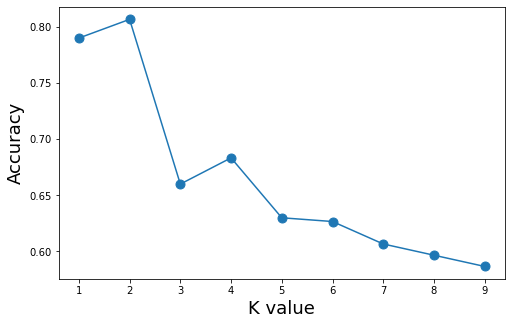

In [121]:
knn_acc = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    acc = cross_val_score(knn, sampled_X, sampled_Y, cv=5)
    knn_acc.append(acc.mean())

plt.figure(figsize=(8,5))
plt.plot(range(1,10),knn_acc, marker='o', markersize=9)
plt.xlabel("K value", fontsize=18)
plt.ylabel("Accuracy",fontsize=18)

- k=4 is optimal

#### Check the feature scaling method to KNN

In [122]:
knn = KNeighborsClassifier(n_neighbors=4)

In [123]:
acc = cross_val_score(knn, sampled_X, sampled_Y, cv=5)
print("Accuracy KNN without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN without transformation: 0.68 (+/- 0.12)


In [124]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Standardization: 0.76 (+/- 0.14)


In [125]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.76 (+/- 0.12)


- Normalization performed well

#### Feaure scaling with stadardization and evaluation

In [126]:
# create pipeline 
pipeline = Pipeline(steps=[('scaler',preprocessing.MinMaxScaler()),
                   ('model', knn)])

In [127]:
# perform cross validation -> best 20 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_20, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 20 features: 0.73 (+/- 0.11)


In [128]:
# perform cross validation -> best 50 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_50, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 50 features: 0.81 (+/- 0.11)


In [130]:
# perform cross validation -> best 100 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_100, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 100 features: 0.78 (+/- 0.11)


#### Select best 60 features, data balancing, splitting, training and evaluating

In [131]:
#first 60 atures with high correlation
high_cor_60=cor_target.iloc[cor_target.argsort()[-61:-1]]

# select 60 features
selected_60_x = df[high_cor_60.index]
selected_60_x.shape

(757, 60)

In [132]:
# Fit the model to generate the data with 60 features dataset
oversampled_X_60, oversampled_Y = ros.fit_sample(selected_60_x, Y)
sampled_X_60, sampled_Y = rus.fit_sample(oversampled_X_60, oversampled_Y)

In [134]:
# perform cross validation -> best 60 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_60, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN using best 60 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 60 features: 0.79 (+/- 0.05)


#### Select best 40 features, data balancing, splitting, training and evaluating

In [135]:
#first 40 atures with high correlation
high_cor_40=cor_target.iloc[cor_target.argsort()[-41:-1]]

# select 40 features
selected_40_x = df[high_cor_40.index]
selected_40_x.shape

(757, 40)

In [136]:
# Fit the model to generate the data with 40 features dataset
oversampled_X_40, oversampled_Y = ros.fit_sample(selected_40_x, Y)
sampled_X_40, sampled_Y = rus.fit_sample(oversampled_X_40, oversampled_Y)

In [137]:
# perform cross validation -> best 40 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_40, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN using best 40 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 40 features: 0.81 (+/- 0.09)


#### Select best 30 features, data balancing, splitting, training and evaluating

In [138]:
#first 30 atures with high correlation
high_cor_30=cor_target.iloc[cor_target.argsort()[-31:-1]]

# select 30 features
selected_30_x = df[high_cor_30.index]
selected_30_x.shape

(757, 30)

In [139]:
# Fit the model to generate the data with 30 features dataset
oversampled_X_30, oversampled_Y = ros.fit_sample(selected_30_x, Y)
sampled_X_30, sampled_Y = rus.fit_sample(oversampled_X_30, oversampled_Y)

In [140]:
# perform cross validation -> best 30 features 
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X_30, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN using best 30 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 30 features: 0.79 (+/- 0.07)
